In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [5]:
df.drop(columns = ["Unnamed: 0", "region_1", "region_2", "taster_name", "taster_twitter_handle", "title"], inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   designation  92506 non-null   object 
 3   points       129971 non-null  int64  
 4   price        120975 non-null  float64
 5   province     129908 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


In [6]:
# overall NAs 
df.isna().sum()


country           63
description        0
designation    37465
points             0
price           8996
province          63
variety            1
winery             0
dtype: int64

price is the most important value to serve as target, so that we need to deal with it first.

1. check the distribution
2. check the missing value ratio

found 1: extreme outliers

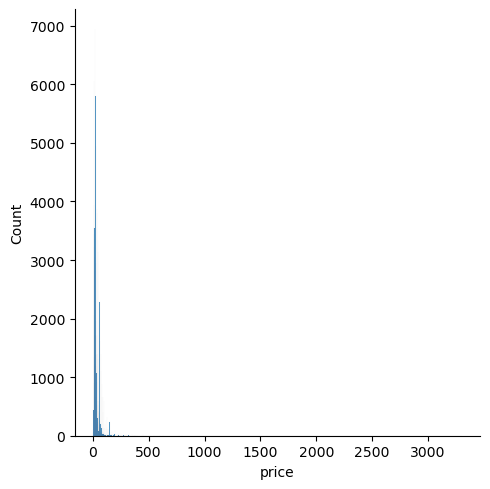

In [7]:
# price distribution plot
sns.displot(df["price"])

found 2: about 7% missing value

In [8]:
# ratio of missing value for price variable
df['price'].isna().sum()/len(df)

0.06921544036746659

count the number of each values, and it seems like most of value are smaller than 100

In [9]:
df['price'].value_counts()

20.0     6940
15.0     6066
25.0     5805
30.0     4951
18.0     4883
         ... 
574.0       1
630.0       1
764.0       1
319.0       1
848.0       1
Name: price, Length: 390, dtype: int64

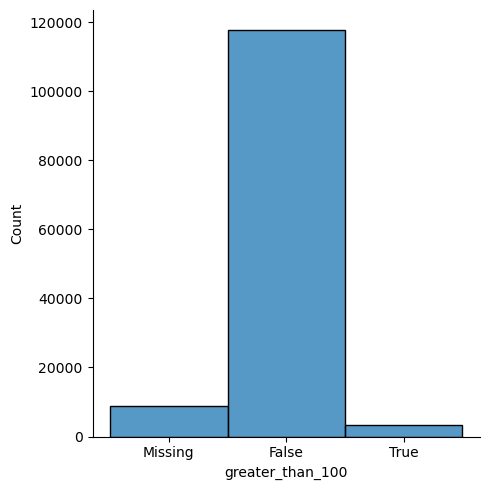

In [10]:
# multiple condition
condition = [
    (pd.isnull(df['price'])),
    (df['price'] > 100),
    (df['price'] <= 100)
]

values = [
    "Missing",
    "True",
    "False"
]
df['greater_than_100'] = np.select(condition, values)
df['greater_than_100'].value_counts()
sns.displot(df['greater_than_100'])
plt.show()

In [11]:
# ignore missing price and price that is greater than 100
df_filter = df[df['greater_than_100'] == "False"]
df_filter["price_cat"] = np.where(df_filter['price'] > 25, 1, 0)

/var/folders/jy/j2w_t12n7sxby0bnmzq56hjm0000gn/T/ipykernel_23062/3075684344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["price_cat"] = np.where(df_filter['price'] > 25, 1, 0)


In [12]:
from sklearn import preprocessing

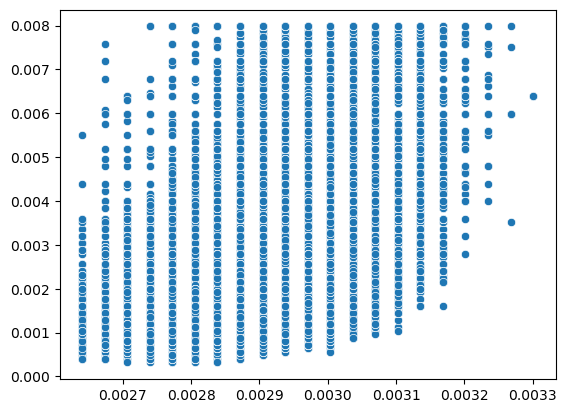

In [13]:

price = preprocessing.normalize([df_filter['price']]).flatten()
point = preprocessing.normalize([df_filter['points']]).flatten()



sns.scatterplot(x = point, y = price)
plt.show()

Text preprocessing for modeling

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy # POS tagging
import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phoebezou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2023-04-08 20:29:56.560856: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
def clean_sentence(text):
    text = text.lower()
    text = re.sub(r'[^a-z]\s', ' ', text)
    #print(type(text))
    text_tokens = text.split()
    tokens = [word for word in text_tokens if word not in stopwords.words('english')]

    return ' '.join(tokens)


nlp = spacy.load('en_core_web_sm')

def clean_text(text):

    pos_words = nlp(text)

    clean = [tokens.text for tokens in pos_words if (tokens.pos_ == 'ADJ' or tokens.pos_ == 'NOUN')]

    return " ".join(clean)

#clean_sentence(df['description'][0])

In [21]:
description = df_filter['description'].apply(clean_sentence).apply(clean_text)

In [67]:
description.head()

1    ripe fruity wine smooth structured firm tannin...
2    tart snappy flavors lime flesh rind green pine...
3    pineapple palate bit opulent notes honey guava...
4    regular rough tannic rustic earthy herbal char...
5    typical case horseradish mouth full bodied aci...
Name: description, dtype: object

In [56]:
import csv
with open('./description.csv', 'w') as f:
    for line in description:
        f.write(line + '\n')



In [61]:
des = {}
with open('./description.csv', 'r') as f:
    reader = csv.reader(f, delimiter = '\n')
    i = 0
    for text in reader:
        des[i] = text
        i += 1

desc = pd.DataFrame.from_dict(des, orient = 'index')
desc = desc.rename(columns = {0 : 'description'})


In [62]:
desc.head()


,description
0,ripe fruity wine smooth structured firm tannin...
1,tart snappy flavors lime flesh rind green pine...
2,pineapple palate bit opulent notes honey guava...
3,regular rough tannic rustic earthy herbal char...
4,typical case horseradish mouth full bodied aci...


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [64]:
# data split for OLS
X1 = np.array(df_filter['points'].copy()).reshape((-1,1))  
y1 = np.array(df_filter['price'].copy())  
X1_reg_train, X1_reg_test, y1_reg_train, y1_reg_test = train_test_split(X1, y1, stratify = y1, random_state = 100)



In [65]:
# data split for OLS + x^2
df_filter['point^2'] = df_filter['points'] ** 2
X2 = np.array(df_filter[['points', 'point^2']].copy())
y2 = np.array(df_filter['price'].copy())
X2_reg_train, X2_reg_test, y2_reg_train, y2_reg_test = train_test_split(X2, y2, stratify = y2, random_state = 100)

/var/folders/jy/j2w_t12n7sxby0bnmzq56hjm0000gn/T/ipykernel_23062/1274894314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['point^2'] = df_filter['points'] ** 2


In [66]:
# data split for x^2
X3 = np.array(df_filter['point^2'].copy()).reshape(-1,1)
y3 = np.array(df_filter['price'].copy())
X3_reg_train, X3_reg_test, y3_reg_train, y3_reg_test = train_test_split(X3, y3, stratify = y3, random_state = 100)

In [ ]:
df_filter.head()

,country,description,designation,points,price,province,variety,winery,greater_than_100,price_cat,point^2
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Portuguese Red,Quinta dos Avidagos,False,0,7569
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Pinot Gris,Rainstorm,False,0,7569
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Riesling,St. Julian,False,0,7569
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Pinot Noir,Sweet Cheeks,False,1,7569
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Tempranillo-Merlot,Tandem,False,0,7569


In [68]:
# Data split for classification
X = description.copy()
y = df_filter['price_cat'].astype(str).copy()

vectorizer = TfidfVectorizer()
X_idf = vectorizer.fit_transform(X)

X_clas_train, X_clas_test, y_clas_train, y_clas_test = train_test_split(X_idf, y, stratify = y, random_state = 101)

In [69]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm

In [ ]:
X1_reg_train = sm.add_constant(X1_reg_train)
est = sm.OLS(y1_reg_train, X1_reg_train).fit()
print(est.summary())
sm.graphics.plot_regress_exog(est, 'y1_reg_train', fig = plt.figure(figsize = (14,8)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                 3.797e+04
Date:                Sat, 08 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:29:10   Log-Likelihood:            -3.7004e+05
No. Observations:               88206   AIC:                         7.401e+05
Df Residuals:                   88204   BIC:                         7.401e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -283.0147      1.613   -175.474      0.0

In [202]:
sm.graphics.plot_regress_exog(est, 'y1_reg_train', fig = plt.figure(figsize = (14,8)))

NameError: name 'est' is not defined

In [ ]:
X2_reg_train = sm.add_constant(X2_reg_train)
est2 = sm.OLS(y2_reg_train, X2_reg_train).fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                 2.180e+04
Date:                Sat, 08 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:29:13   Log-Likelihood:            -3.6811e+05
No. Observations:               88206   AIC:                         7.362e+05
Df Residuals:                   88203   BIC:                         7.363e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2004.4495     36.474     54.955      0.0

In [ ]:
X3_reg_train = sm.add_constant(X3_reg_train)
est3 = sm.OLS(y3_reg_train, X3_reg_train).fit()
print(est3.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                 3.869e+04
Date:                Sat, 08 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:29:19   Log-Likelihood:            -3.6979e+05
No. Observations:               88206   AIC:                         7.396e+05
Df Residuals:                   88204   BIC:                         7.396e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -127.1769      0.806   -157.708      0.0

In [70]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [77]:
svm_linear = svm.SVC(kernel = 'linear')
svm_linear.fit(X_clas_train, y_clas_train)
svm_pred = svm_linear.predict(X_clas_test)


In [78]:
svm_report = metrics.classification_report(y_clas_test, svm_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     15319
           1       0.75      0.72      0.74     14084

    accuracy                           0.75     29403
   macro avg       0.75      0.75      0.75     29403
weighted avg       0.75      0.75      0.75     29403



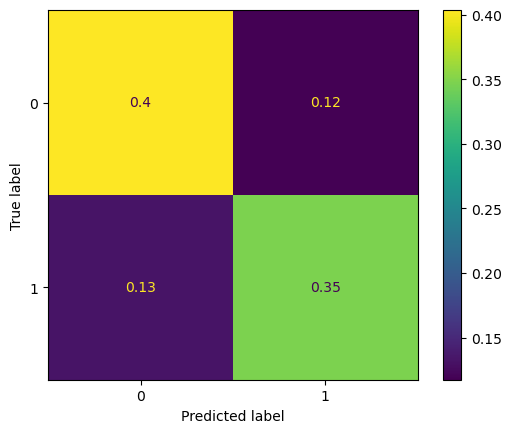

In [79]:
svm_cm = metrics.confusion_matrix(y_clas_test, svm_pred, normalize = 'all')
svm_fig = metrics.ConfusionMatrixDisplay(svm_cm).plot()
plt.show()

In [71]:
rf_clf = RandomForestClassifier(criterion = 'entropy', bootstrap = False)
rf_clf.fit(X_clas_train, y_clas_train)
rf_clf_pred = rf_clf.predict(X_clas_test)


In [73]:
rf_clf_report = metrics.classification_report(y_clas_test, rf_clf_pred)
print(rf_clf_report)


              precision    recall  f1-score   support

           0       0.77      0.80      0.78     15319
           1       0.77      0.73      0.75     14084

    accuracy                           0.77     29403
   macro avg       0.77      0.77      0.77     29403
weighted avg       0.77      0.77      0.77     29403



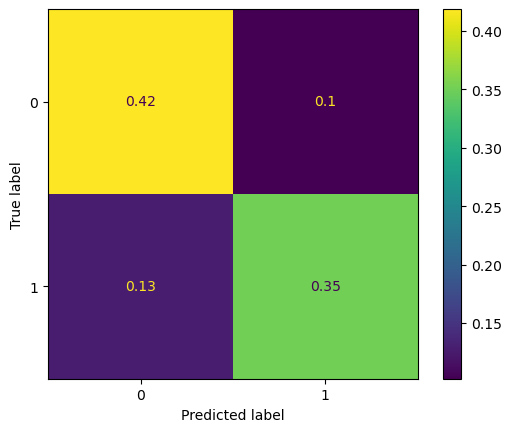

In [76]:
rf_clf_cm = metrics.confusion_matrix(y_clas_test, rf_clf_pred, normalize = 'all')
rf_clf_fig = metrics.ConfusionMatrixDisplay(rf_clf_cm).plot()
plt.show()

In [80]:
xgb_clas = xgb.XGBClassifier()
xgb_clas.fit(X_clas_train, y_clas_train.astype(int))
xgb_pred = xgb_clas.predict(X_clas_test)

              precision    recall  f1-score   support

           0       0.73      0.78      0.75     15319
           1       0.74      0.69      0.71     14084

    accuracy                           0.73     29403
   macro avg       0.74      0.73      0.73     29403
weighted avg       0.74      0.73      0.73     29403



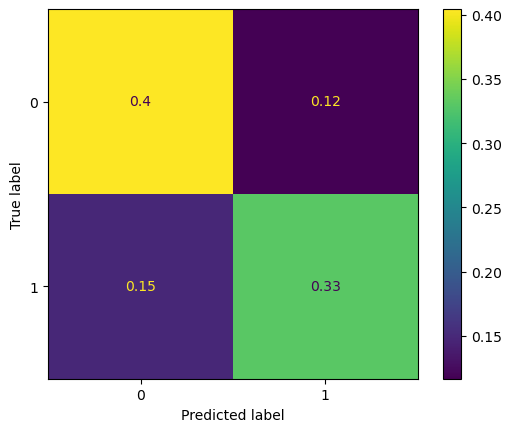

In [82]:
xgb_report = metrics.classification_report(y_clas_test.astype(int), xgb_pred)
print(xgb_report)
xgb_cm = metrics.confusion_matrix(y_clas_test.astype(int), xgb_pred, normalize = 'all')
xgb_fig = metrics.ConfusionMatrixDisplay(xgb_cm).plot()
plt.show()

In [83]:
vectorizer.get_feature_names()[:10]

/Users/phoebezou/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00', '04s', '05s', '06', '06s', '07s', '08s', '09s', '10', '100']

/Users/phoebezou/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


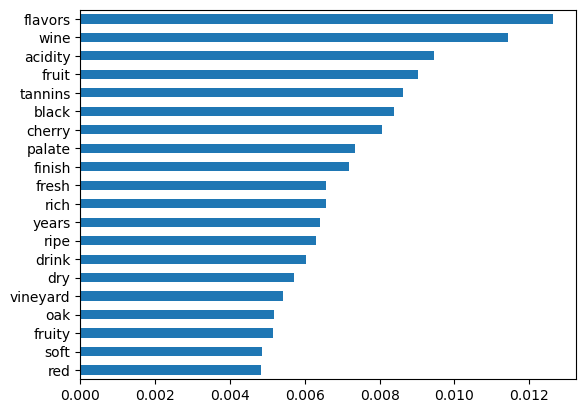

In [87]:
importance = pd.Series(rf_clf.feature_importances_, vectorizer.get_feature_names())
importance.sort_values().tail(20).plot(kind='barh')
plt.show()

frequency distributions

In [140]:
stopwords_list = stopwords.words('english')
stopwords_list.extend(['wine', 'flavors', 'flavor', 'year', 'years', "'s"])
stopwords_list += string.punctuation

In [120]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/phoebezou/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [127]:
# from the whole dataset
from nltk.probability import FreqDist
dd = data_desc['description']
','.join(dd)
token = word_tokenize(','.join(dd))
token = [words for words in token if words not in stopwords_list]
freq = FreqDist(token)
freq.most_common(20)

[('fruit', 44045),
 ('palate', 30080),
 ('acidity', 29851),
 ('tannins', 25412),
 ('black', 25290),
 ('cherry', 24779),
 ('finish', 24511),
 ('ripe', 20604),
 ('drink', 16630),
 ('fresh', 14987),
 ('rich', 14567),
 ('red', 14515),
 ('dry', 14468),
 ('full', 13835),
 ('notes', 13164),
 ('sweet', 12067),
 ('soft', 11942),
 ('spice', 11851),
 ('aromas', 11281),
 ('oak', 11277)]

In [150]:
# from the price lower than 25
lower_than_25 = df_filter.loc[df_filter['price_cat'] == 0]['description']
lower_than_25_token = word_tokenize(','.join(lower_than_25))
lower_than_25_clean = [word.lower() for word in lower_than_25_token if word.lower() not in stopwords_list]

In [151]:
lower_freq = FreqDist(lower_than_25_clean)
lower_freq.most_common(20)

[('aromas', 20470),
 ('fruit', 18967),
 ('palate', 17916),
 ('acidity', 15457),
 ('finish', 11874),
 ('drink', 11506),
 ('ripe', 11261),
 ('cherry', 10049),
 ('fresh', 9703),
 ('tannins', 9645),
 ('notes', 8751),
 ('red', 8343),
 ('nose', 8186),
 ('black', 8120),
 ('dry', 7917),
 ('berry', 7889),
 ('apple', 7786),
 ('crisp', 7717),
 ('citrus', 7266),
 ('spice', 7145)]

In [141]:
higher_than_25 = df_filter.loc[df_filter['price_cat'] == 1]['description']
higher_than_25_token = word_tokenize(','.join(higher_than_25))
higher_than_25_clean = [word.lower() for word in higher_than_25_token if word.lower() not in stopwords_list]

In [142]:
higher_freq = FreqDist(higher_than_25_clean)
higher_freq.most_common(20)

[('fruit', 20331),
 ('palate', 16889),
 ('aromas', 16033),
 ('cherry', 14961),
 ('tannins', 14492),
 ('black', 14457),
 ('drink', 12931),
 ('acidity', 12298),
 ('ripe', 12006),
 ('oak', 9322),
 ('rich', 8959),
 ('finish', 8909),
 ('spice', 8859),
 ('red', 8591),
 ('notes', 8302),
 ('nose', 7832),
 ('blackberry', 6961),
 ('dark', 6459),
 ('cabernet', 6432),
 ('blend', 6274)]

In [144]:
import nltk

In [146]:
lower_than_25_token

['This',
 'is',
 'ripe',
 'and',
 'fruity',
 ',',
 'a',
 'wine',
 'that',
 'is',
 'smooth',
 'while',
 'still',
 'structured',
 '.',
 'Firm',
 'tannins',
 'are',
 'filled',
 'out',
 'with',
 'juicy',
 'red',
 'berry',
 'fruits',
 'and',
 'freshened',
 'with',
 'acidity',
 '.',
 'It',
 "'s",
 'already',
 'drinkable',
 ',',
 'although',
 'it',
 'will',
 'certainly',
 'be',
 'better',
 'from',
 '2016.',
 ',',
 'Tart',
 'and',
 'snappy',
 ',',
 'the',
 'flavors',
 'of',
 'lime',
 'flesh',
 'and',
 'rind',
 'dominate',
 '.',
 'Some',
 'green',
 'pineapple',
 'pokes',
 'through',
 ',',
 'with',
 'crisp',
 'acidity',
 'underscoring',
 'the',
 'flavors',
 '.',
 'The',
 'wine',
 'was',
 'all',
 'stainless-steel',
 'fermented.',
 ',',
 'Pineapple',
 'rind',
 ',',
 'lemon',
 'pith',
 'and',
 'orange',
 'blossom',
 'start',
 'off',
 'the',
 'aromas',
 '.',
 'The',
 'palate',
 'is',
 'a',
 'bit',
 'more',
 'opulent',
 ',',
 'with',
 'notes',
 'of',
 'honey-drizzled',
 'guava',
 'and',
 'mango',
 'g

In [147]:
lower_bigram = nltk.bigrams(lower_than_25_clean)
lower_bigram_freq = FreqDist(lower_bigram)
lower_bigram_freq.most_common(20)

[(('drink', 'now.'), 3623),
 (('black', 'cherry'), 2328),
 (('palate', 'offers'), 1765),
 (('cabernet', 'sauvignon'), 1419),
 (('green', 'apple'), 1370),
 (('sauvignon', 'blanc'), 1359),
 (('nose', 'palate'), 1178),
 (('ready', 'drink.'), 1165),
 (('ready', 'drink'), 1164),
 (('stone', 'fruit'), 1153),
 (('tropical', 'fruit'), 1122),
 (('crisp', 'acidity'), 1117),
 (('finish', 'drink'), 1064),
 (('white', 'peach'), 1054),
 (('berry', 'fruits'), 1052),
 (('pinot', 'noir'), 1037),
 (('red', 'berry'), 1023),
 (('white', 'pepper'), 954),
 (('black', 'fruits'), 944),
 (('berry', 'aromas'), 933)]

In [149]:
higher_bigram = nltk.bigrams(higher_than_25_clean)
higher_bigram_freq = FreqDist(higher_bigram)
higher_bigram_freq.most_common(20)

[(('black', 'cherry'), 4356),
 (('cabernet', 'sauvignon'), 3080),
 (('palate', 'offers'), 2005),
 (('pinot', 'noir'), 1883),
 (('black', 'pepper'), 1764),
 (('drink', 'now.'), 1698),
 (('cabernet', 'franc'), 1544),
 (('petit', 'verdot'), 1301),
 (('white', 'pepper'), 1282),
 (('black', 'fruit'), 1222),
 (('black', 'currant'), 1217),
 (('french', 'oak'), 1154),
 (('red', 'cherry'), 1146),
 (('palate', 'delivers'), 1146),
 (('cherry', 'fruit'), 1117),
 (('firm', 'tannins'), 1102),
 (('finish', 'drink'), 1070),
 (('dark', 'chocolate'), 1060),
 (('nose', 'palate'), 1047),
 (('full', 'bodied'), 935)]

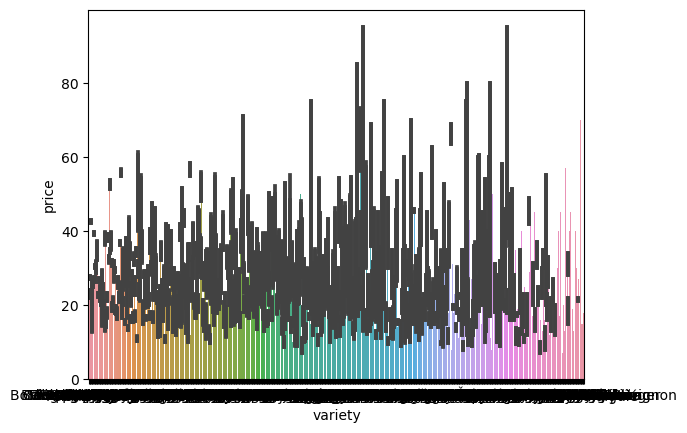

In [154]:
sns.barplot(x = 'variety', y = '', data = df_filter)
plt.show()

In [162]:
variety_count = dict(df_filter['variety'].value_counts())
df_filter['variety_count'] = df_filter['variety'].map(variety_count)

/var/folders/jy/j2w_t12n7sxby0bnmzq56hjm0000gn/T/ipykernel_23062/2977427313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['variety_count'] = df_filter['variety'].map(variety_count)


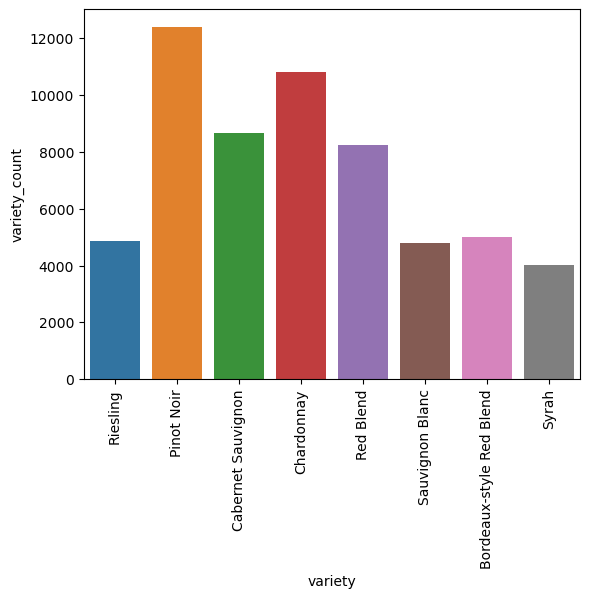

In [168]:
variety_df = df_filter[df_filter['variety_count']>4000]
sns.barplot(x = 'variety', y = 'variety_count', data = variety_df)
plt.xticks(rotation = 90)
plt.show()

In [183]:
variety_df['variety'].

AttributeError: 'Series' object has no attribute 'counts'

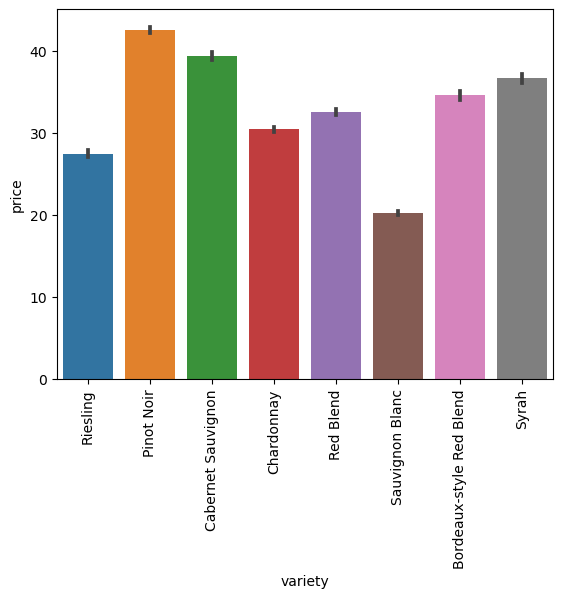

In [169]:
sns.barplot(x = 'variety', y = 'price', data = variety_df)
plt.xticks(rotation = 90)
plt.show()

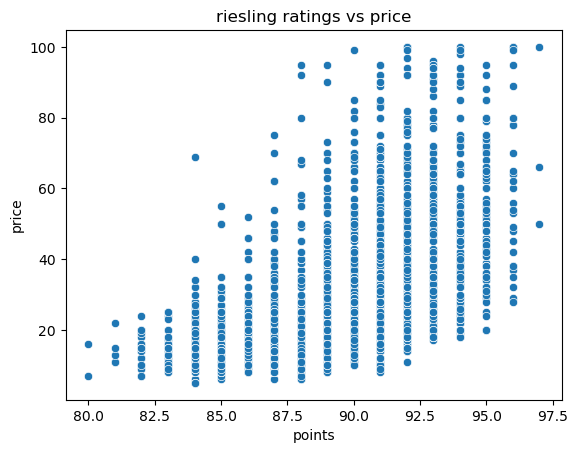

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     2375.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:15:45   Log-Likelihood:                -19654.
No. Observations:                4874   AIC:                         3.931e+04
Df Residuals:                    4872   BIC:                         3.933e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -277.6672      6.264    -44.327      0.0

In [190]:
sns.scatterplot(x = 'points', y = 'price', data = variety_df[variety_df['variety'] == "Riesling"]).set(title = 'riesling ratings vs price')
plt.show()

riesling_x = variety_df[variety_df['variety'] == 'Riesling']['points']
riesling_y = variety_df[variety_df['variety'] == 'Riesling']['price']
riesling_x = sm.add_constant(riesling_x)
riesling_est = sm.OLS(riesling_y, riesling_x).fit()
print(riesling_est.summary())

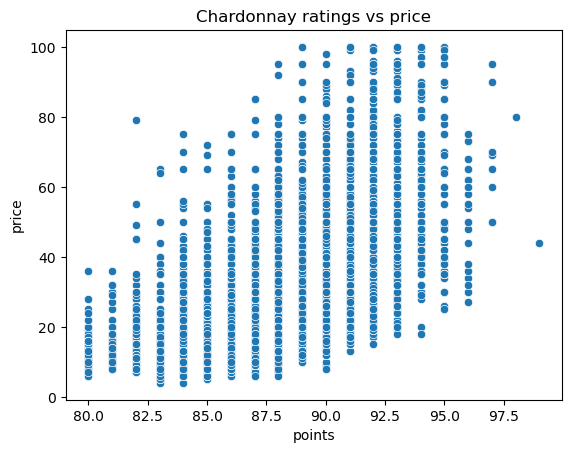

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     6910.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:16:59   Log-Likelihood:                -43761.
No. Observations:               10826   AIC:                         8.753e+04
Df Residuals:                   10824   BIC:                         8.754e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -277.5648      3.707    -74.866      0.0

In [191]:
sns.scatterplot(x = 'points', y = 'price', data = variety_df[variety_df['variety'] == 'Chardonnay']).set(title = 'Chardonnay ratings vs price')
plt.show()

chardonnay_x = variety_df[variety_df['variety'] == 'Chardonnay']['points']
chardonnay_y = variety_df[variety_df['variety'] == 'Chardonnay']['price']
chardonnay_x = sm.add_constant(chardonnay_x)
chardonnay_est = sm.OLS(chardonnay_y, chardonnay_x).fit()
print(chardonnay_est.summary())

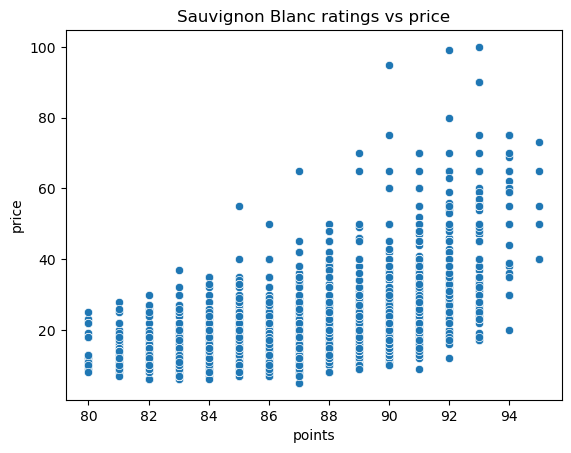

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     1906.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:17:15   Log-Likelihood:                -16818.
No. Observations:                4781   AIC:                         3.364e+04
Df Residuals:                    4779   BIC:                         3.365e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -147.9193      3.853    -38.395      0.0

In [192]:
sns.scatterplot(x = 'points', y = 'price', data = variety_df[variety_df['variety'] == "Sauvignon Blanc"]).set(title = 'Sauvignon Blanc ratings vs price')
plt.show()

sav_blac_x = variety_df[variety_df['variety'] == 'Sauvignon Blanc']['points']
sav_blac_y = variety_df[variety_df['variety'] == 'Sauvignon Blanc']['price']
sav_blac_x = sm.add_constant(sav_blac_x)
sav_blac_est = sm.OLS(sav_blac_y, sav_blac_x).fit()
print(sav_blac_est.summary())

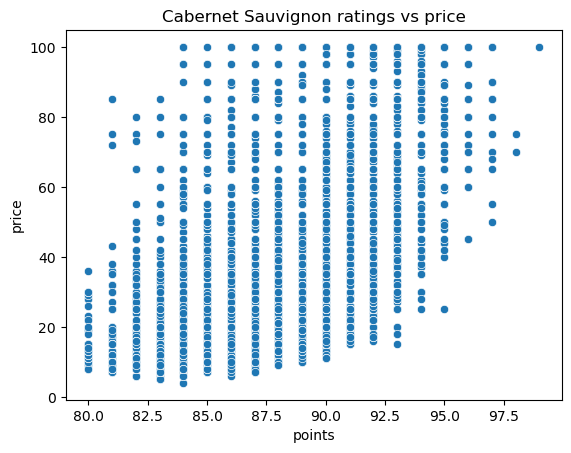

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     4280.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:19:23   Log-Likelihood:                -38287.
No. Observations:                8685   AIC:                         7.658e+04
Df Residuals:                    8683   BIC:                         7.659e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -348.3594      5.930    -58.742      0.0

In [193]:
sns.scatterplot(x = 'points', y = 'price', data = variety_df[variety_df['variety'] == "Cabernet Sauvignon"]).set(title = 'Cabernet Sauvignon ratings vs price')
plt.show()

cab_sav_x = variety_df[variety_df['variety'] == 'Cabernet Sauvignon']['points']
cab_sav_y = variety_df[variety_df['variety'] == 'Cabernet Sauvignon']['price']
cab_sav_x = sm.add_constant(cab_sav_x)
cab_sav_est = sm.OLS(cab_sav_y, cab_sav_x).fit()
print(cab_sav_est.summary())


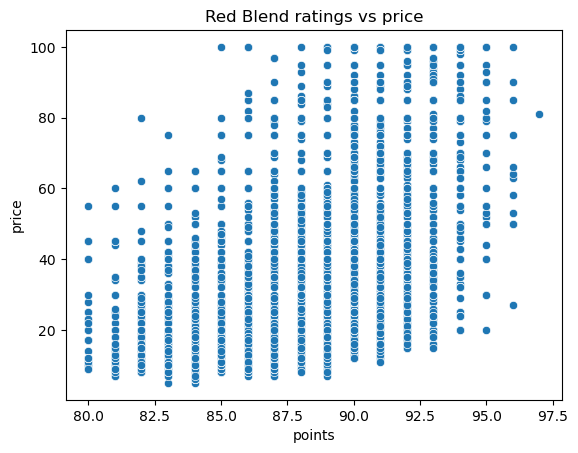

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     2645.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:21:07   Log-Likelihood:                -35002.
No. Observations:                8263   AIC:                         7.001e+04
Df Residuals:                    8261   BIC:                         7.002e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -274.2184      5.968    -45.947      0.0

In [194]:
sns.scatterplot(x = 'points', y = 'price', data = variety_df[variety_df['variety'] == "Red Blend"]).set(title = 'Red Blend ratings vs price')
plt.show()

red_blend_x = variety_df[variety_df['variety'] == 'Red Blend']['points']
red_blend_y = variety_df[variety_df['variety'] == 'Red Blend']['price']
red_blend_x = sm.add_constant(red_blend_x)
red_blend_est = sm.OLS(red_blend_y, red_blend_x).fit()
print(red_blend_est.summary())

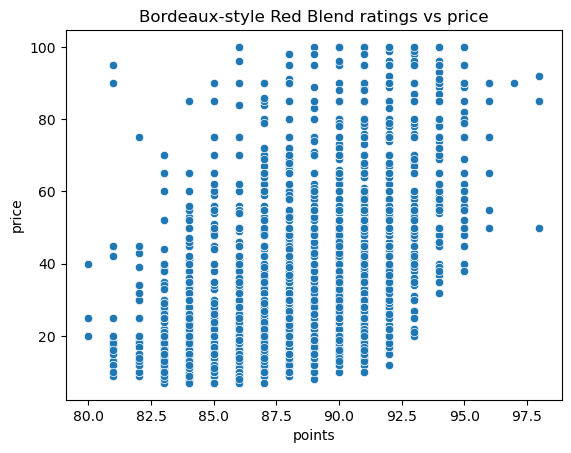

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     1989.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:22:11   Log-Likelihood:                -21376.
No. Observations:                4999   AIC:                         4.276e+04
Df Residuals:                    4997   BIC:                         4.277e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -308.6313      7.699    -40.087      0.0

In [195]:
sns.scatterplot(x = 'points', y = 'price', data = variety_df[variety_df['variety'] == "Bordeaux-style Red Blend"]).set(title = 'Bordeaux-style Red Blend ratings vs price')
plt.show()

bordeaux_x = variety_df[variety_df['variety'] == 'Bordeaux-style Red Blend']['points']
bordeaux_y = variety_df[variety_df['variety'] == 'Bordeaux-style Red Blend']['price']
bordeaux_x = sm.add_constant(bordeaux_x)
bordeaux_est = sm.OLS(bordeaux_y, bordeaux_x).fit()
print(bordeaux_est.summary())

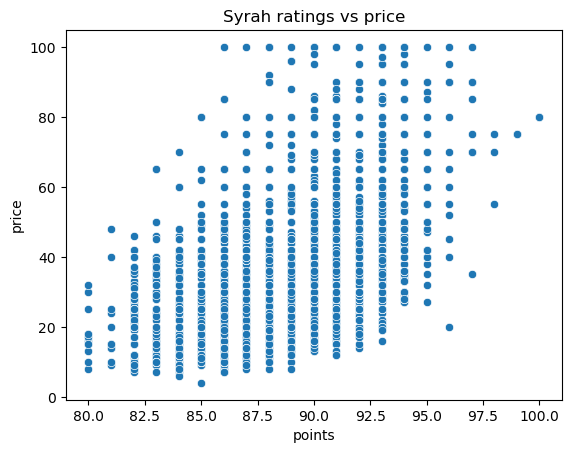

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     1341.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          2.19e-253
Time:                        19:23:22   Log-Likelihood:                -16504.
No. Observations:                4004   AIC:                         3.301e+04
Df Residuals:                    4002   BIC:                         3.302e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -217.7501      6.953    -31.319      0.0

In [197]:
sns.scatterplot(x = 'points', y = 'price', data = variety_df[variety_df['variety'] == "Syrah"]).set(title = 'Syrah ratings vs price')
plt.show()

syrah_x = variety_df[variety_df['variety'] == 'Syrah']['points']
syrah_y = variety_df[variety_df['variety'] == 'Syrah']['price']
syrah_x = sm.add_constant(syrah_x)
syrah_est = sm.OLS(syrah_y, syrah_x).fit()
print(syrah_est.summary())

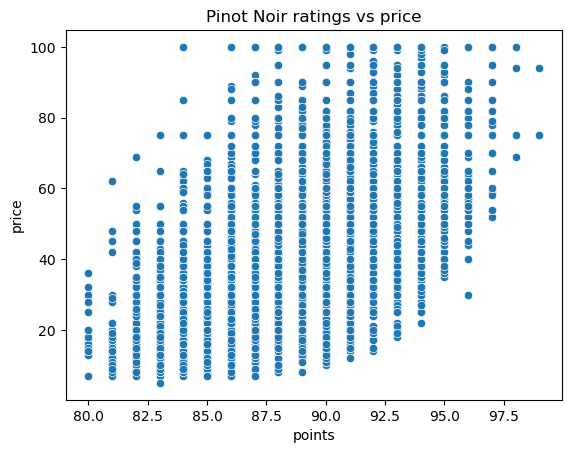

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     6497.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:24:29   Log-Likelihood:                -51503.
No. Observations:               12399   AIC:                         1.030e+05
Df Residuals:                   12397   BIC:                         1.030e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -280.1642      4.006    -69.936      0.0

In [198]:
sns.scatterplot(x = 'points', y = 'price', data = variety_df[variety_df['variety'] == "Pinot Noir"]).set(title = 'Pinot Noir ratings vs price')
plt.show()

pinot_noir_x = variety_df[variety_df['variety'] == 'Pinot Noir']['points']
pinot_noir_y = variety_df[variety_df['variety'] == 'Pinot Noir']['price']
pinot_noir_x = sm.add_constant(pinot_noir_x)
pinot_noir_est = sm.OLS(pinot_noir_y, pinot_noir_x).fit()
print(pinot_noir_est.summary())

In [199]:
all_x = variety_df['points']
all_y = variety_df['price']
all_x = sm.add_constant(all_x)
all_est = sm.OLS(all_y, all_x).fit()
print(all_est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                 2.653e+04
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:30:51   Log-Likelihood:            -2.4884e+05
No. Observations:               58831   AIC:                         4.977e+05
Df Residuals:                   58829   BIC:                         4.977e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -290.7959      1.997   -145.622      0.0

In [177]:
variety_df['types'] = np.where(
    (variety_df['variety'] == "Riesling") |
    (variety_df['variety'] == 'Chardonnay') |
    (variety_df['variety'] == 'Sauvignon Blanc'), 'white', 'red'
    )



/var/folders/jy/j2w_t12n7sxby0bnmzq56hjm0000gn/T/ipykernel_23062/362633374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety_df['types'] = np.where(


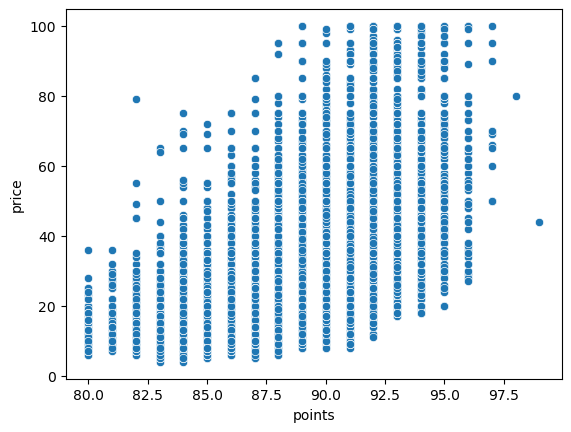

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.072e+04
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:32:04   Log-Likelihood:                -82047.
No. Observations:               20481   AIC:                         1.641e+05
Df Residuals:                   20479   BIC:                         1.641e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -251.9851      2.700    -93.338      0.0

In [200]:
sns.scatterplot(x = 'points', y = 'price', data = variety_df[variety_df['types'] == 'white'])
plt.show()

white_x = variety_df[variety_df['types'] == 'white']['points']
white_y = variety_df[variety_df['types'] == 'white']['price']
white_x = sm.add_constant(white_x)
white_est = sm.OLS(white_y, white_x).fit()
print(white_est.summary())

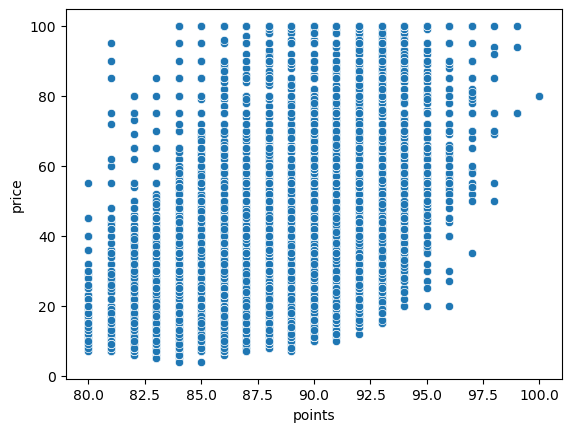

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                 1.683e+04
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:33:06   Log-Likelihood:            -1.6378e+05
No. Observations:               38350   AIC:                         3.276e+05
Df Residuals:                   38348   BIC:                         3.276e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -297.8519      2.591   -114.977      0.0

In [201]:
sns.scatterplot(x = 'points', y = 'price', data = variety_df[variety_df['types'] == 'red'])
plt.show()

red_x = variety_df[variety_df['types'] == 'red']['points']
red_y = variety_df[variety_df['types'] == 'red']['price']
red_x = sm.add_constant(red_x)
red_est = sm.OLS(red_y, red_x).fit()
print(red_est.summary())